## <center>Zadanie 2 DSMUM</center>

### Wczytanie danych

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv('jaslo_i_krakow.csv')
data.drop(data.tail(1).index ,inplace=True)
Jaslo = data['JasloSikorskiego'].bfill().reset_index(drop=True)
Krakow = pd.concat([data['KrakowBulwarowa'], data['KrakowAlejaKrasinskiego']], axis=0).reset_index(drop=True)

In [2]:
Jaslo.info()

<class 'pandas.core.series.Series'>
RangeIndex: 671 entries, 0 to 670
Series name: JasloSikorskiego
Non-Null Count  Dtype  
--------------  -----  
671 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


In [3]:
Krakow.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1342 entries, 0 to 1341
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1342 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


### Sformułowanie hipotezy zerowej i alternatywnej:

<p>H<sub>0</sub> - Stężenie pyłu zawieszonego PM2.5 w Krakowie i Jaśle w lutym 2025 roku nie różniły się.</p>
<p>H<sub>$\alpha$</sub> - Stężenie pyłu zawieszonego PM2.5 w Krakowie i Jaśle w lutym 2025 roku różniły się.</p>


### Poziom istotności

$\alpha$ = 0.05

### Wykresy pudełkowe

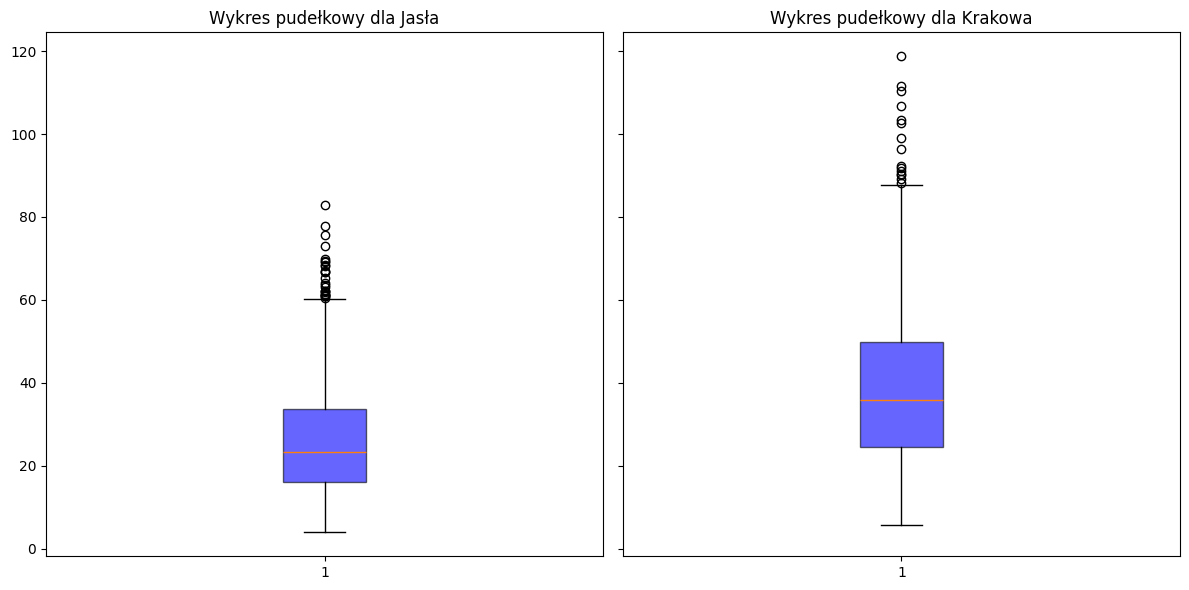

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

ax[0].boxplot(Jaslo, vert=True, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.6))
ax[0].set_title('Wykres pudełkowy dla Jasła')

ax[1].boxplot(Krakow, vert=True, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.6))
ax[1].set_title('Wykres pudełkowy dla Krakowa')

plt.tight_layout()

### Histogramy

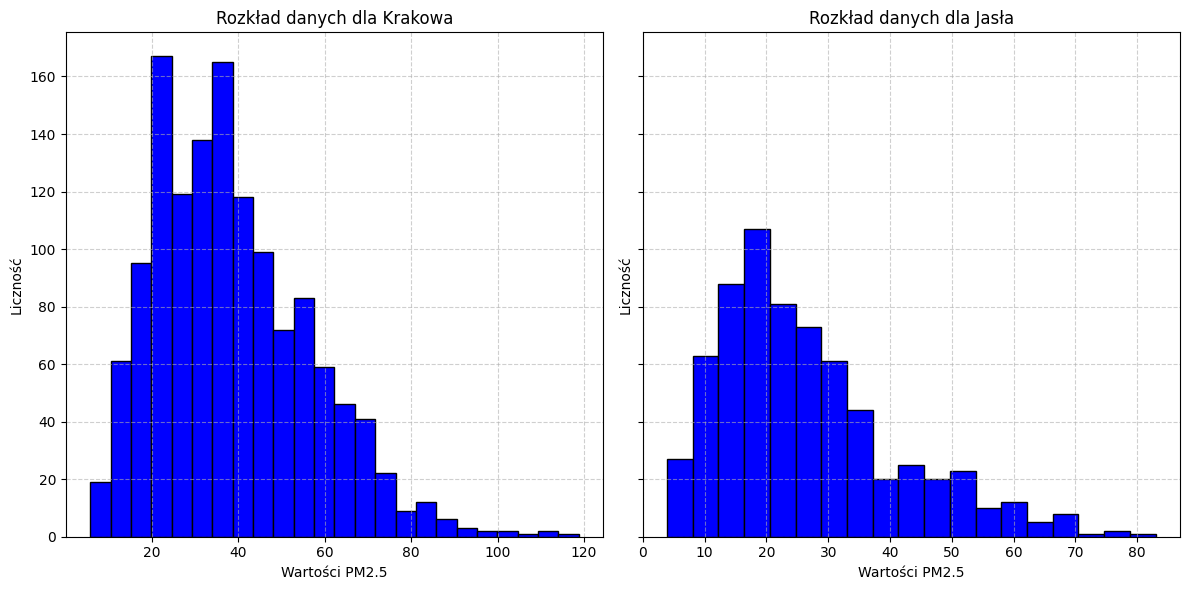

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

ax[0].hist(Krakow, bins=24, color='blue', edgecolor='black', linewidth=1, alpha=1)
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].set_title('Rozkład danych dla Krakowa')
ax[0].set_xlabel('Wartości PM2.5')
ax[0].set_ylabel('Liczność')

ax[1].hist(Jaslo, bins=19, color='blue', edgecolor='black', linewidth=1, alpha=1)
ax[1].grid(True, linestyle='--', alpha=0.6)
ax[1].set_title('Rozkład danych dla Jasła')
ax[1].set_xlabel('Wartości PM2.5')
ax[1].set_ylabel('Liczność')

plt.tight_layout()
plt.show()

### Podsumowanie wizualizacji

Z wizualizacji rozkładu danych wynika, że Kraków posiada wyższe wartości stężenia PM2.5 od wartości zarejestrowanych w Jaśle.

## Test Shapiro-Wilka

Test Shapiro-Wilka służy do weryfikacji hipotezy o normalności rozkładu badanej cechy.

### Wzór statystyki testowej

$$W = \frac{(\sum_{i=1}^{n} a_i x_{(i)})^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

gdzie:
- $W$ - wartość statystyki testowej
- $n$ - liczebność próby
- $x_{(i)}$ - i-ta statystyka pozycyjna (uporządkowana rosnąco wartość cechy)
- $a_i$ - współczynniki wyznaczone na podstawie wartości oczekiwanych statystyk pozycyjnych z rozkładu normalnego
- $\bar{x}$ - średnia arytmetyczna z próby

### Hipotezy

$H_0$: Rozkład badanej cechy jest zgodny z rozkładem normalnym
$H_1$: Rozkład badanej cechy nie jest zgodny z rozkładem normalnym

### Obszar krytyczny

Hipotezę $H_0$ odrzucamy, gdy $W < W_{\alpha}$, gdzie $W_{\alpha}$ jest wartością krytyczną odczytaną z tablic dla testu Shapiro-Wilka dla przyjętego poziomu istotności $\alpha$ i liczebności próby $n$.

In [6]:
from scipy.stats import shapiro


shapiro(Krakow)

ShapiroResult(statistic=0.9597103797246418, pvalue=8.321633841861361e-19)

In [7]:
shapiro(Jaslo)

ShapiroResult(statistic=0.9231282592761787, pvalue=5.2419881186313804e-18)

### Podsumowanie testu Shapiro-Wilka

Wartość p dla wszystkich kolumn są mniejsze od 0.05, a więc odrzucamy hipotezę zerową. Dane nie mają rozkładu normalnego. Należy wybrać test nieparametryczny.

## <center>Odpowiedź na postawione pytanie</center>

Poniżej zostało przeprowadzone wnioskowanie statystyczne mające na celu potwierdzenie lub odrzucenie hipotezy zerowej.

### Test U Manna-Whitneya

Hipoteza zerowa zakłada, że rozkład danych w zbiorze X jest taki sam jak rozkład w zbiorze Y. Test zakłada niezależność grup. Ten warunek jest spełniony, ze względu na różne niepowiązane lokalizacje pomiarów PM2.5.

## Test U Manna-Whitneya

Test U Manna-Whitneya (znany również jako test sumy rang Wilcoxona) to nieparametryczny test statystyczny służący do porównania dwóch niezależnych grup.

### Wzór statystyki testowej

$$U = n_1 n_2 + \frac{n_1(n_1+1)}{2} - R_1$$

lub

$$U' = n_1 n_2 + \frac{n_2(n_2+1)}{2} - R_2$$

gdzie:
- $U$, $U'$ - wartości statystyki testowej (wybieramy mniejszą z nich)
- $n_1$ - liczebność pierwszej próby
- $n_2$ - liczebność drugiej próby
- $R_1$ - suma rang przypisanych obserwacjom z pierwszej próby
- $R_2$ - suma rang przypisanych obserwacjom z drugiej próby

### Weryfikacja

Dla małych prób ($n_1$ i $n_2$ ≤ 20) wartość $U$ porównujemy z wartością krytyczną $U_{\alpha}$ odczytaną z tablic.

Dla dużych prób ($n_1$ lub $n_2$ > 20) stosujemy aproksymację rozkładem normalnym:

$$z = \frac{U - \frac{n_1 n_2}{2}}{\sqrt{\frac{n_1 n_2(n_1 + n_2 + 1)}{12}}}$$

### Hipotezy

$H_0$: Rozkłady w obu populacjach są jednakowe
$H_1$: Rozkłady w obu populacjach różnią się (test dwustronny)

lub

$H_1$: Wartości z pierwszej populacji są systematycznie większe/mniejsze niż z drugiej (test jednostronny)

### Obszar krytyczny

Dla małych prób, $H_0$ odrzucamy, gdy $U < U_{\alpha}$.
Dla dużych prób, $H_0$ odrzucamy, gdy $|z| > z_{\alpha/2}$ (test dwustronny) lub $z > z_{\alpha}$ lub $z < -z_{\alpha}$ (test jednostronny).

In [8]:
from scipy.stats import mannwhitneyu


mannwhitneyu(Krakow, Jaslo, use_continuity=False, method='asymptotic', alternative='two-sided')

MannwhitneyuResult(statistic=639540.5, pvalue=1.6789758404040943e-53)

### Podsumowanie testu U Manna-Whitneya

Wartość p < 0.05 oznacza odrzucenie hipotezy zerowej dla porównań pomiarów z Krakowa z Jaslem.

### <center>Unpaired t-Test</center>

In [9]:
from scipy.stats import ttest_ind


ttest_ind(Krakow, Jaslo)

TtestResult(statistic=15.198120625760891, pvalue=1.82775124685524e-49, df=2011.0)

In [19]:
from scipy.stats import levene


levene(Krakow, Jaslo)

LeveneResult(statistic=33.29846732986324, pvalue=9.132868020092458e-09)


## <center>Ostateczny wniosek</center>

Tabela przedstawia wartości p dla obu testów.
<table>
<tr>
<td>Test</td>
<td>Wartość p</td>
</tr>
<tr>
<td>U Mann-Whitney</td>
<td>1.679*10<sup>-53</sup></td>
</tr>
<tr>
<td>Unpaired t-Test</td>
<td>1.828*10<sup>-49</sup></td>
</tr>
<table>

Ze względu na zdecydowanie mniejsze wartości p z poszczególnych testów odrzucamy hipotezę zerową. Potwierdzona zostaje hipoteza alternatywna, że pomiary PM2.5 w Krakowie i Jaśle w lutym 2025 roku się różnią.